In [74]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pylab as plt
import sys
sys.path.append('../zdrojaky')
from tsplot import tsplot

In [55]:
fn = 'co2.csv'
df = pd.read_csv(fn, infer_datetime_format=True, index_col=0)
df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 1958-01-01 to 2018-12-01
Data columns (total 1 columns):
CO2    732 non-null float64
dtypes: float64(1)
memory usage: 11.4 KB


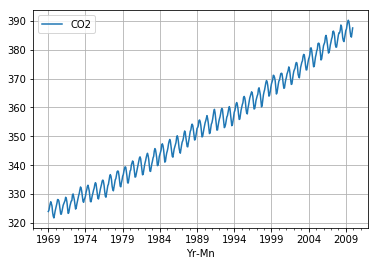

In [68]:
dfs = df['1969':'2009']
#dfs = df
#dfs[dfs['CO2']<0] = np.nan
dfs.plot()

In [95]:
model = sm.tsa.SARIMAX(dfs, order=(0,1,1), seasonal_order=(0,0,1,12))
res = model.fit(trend='nc')
print(res.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                CO2   No. Observations:                  492
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -534.097
Date:                            Mon, 10 Dec 2018   AIC                           1074.195
Time:                                    12:34:40   BIC                           1086.790
Sample:                                01-01-1969   HQIC                          1079.141
                                     - 12-01-2009                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4993      0.045     11.155      0.000       0.412       0.587
ma.S.L12       0.6001      0.044   

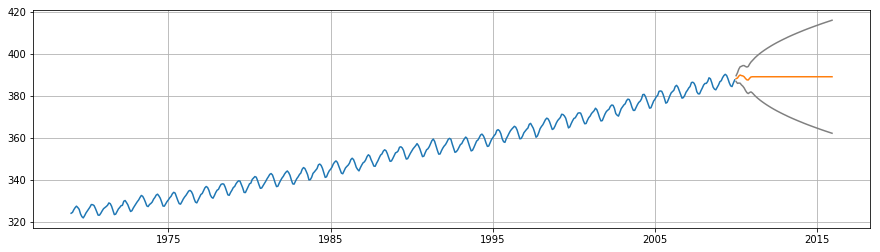

In [96]:
forecast_date = '2015'
forecast = res.get_forecast(forecast_date)
plt.figure(figsize=(15,4))
plt.plot(dfs)
plt.plot(forecast.summary_frame()['mean_ci_lower'], color='gray')
plt.plot(forecast.summary_frame()['mean'])
plt.plot(forecast.summary_frame()['mean_ci_upper'], color='gray')
plt.show()

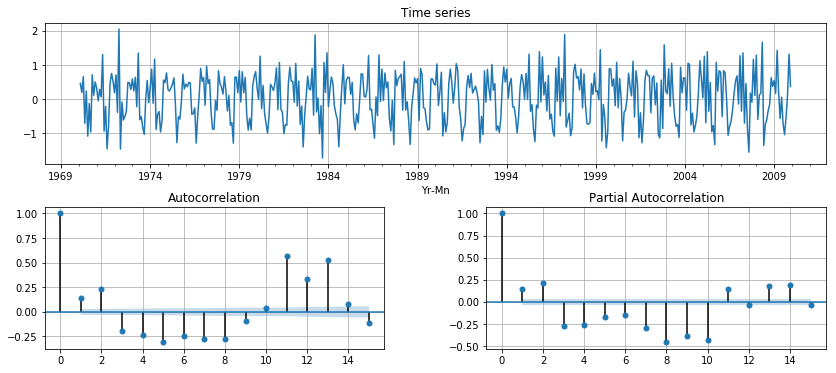

In [97]:
tsplot(res.resid['1970-02':])
preds = res.get_prediction(dynamic=True)

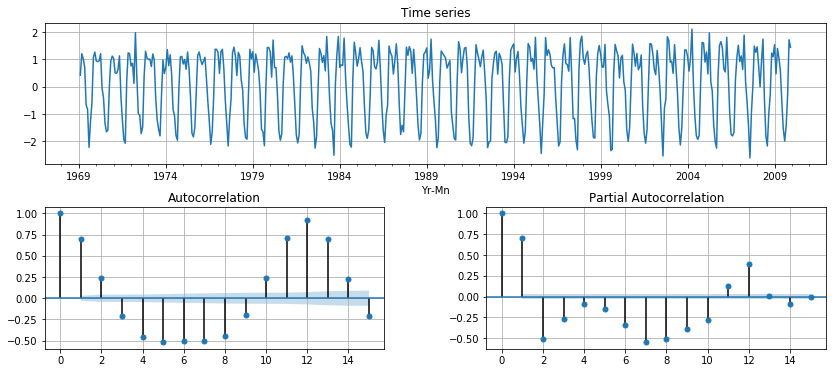

In [111]:
tsplot(dfs.CO2.diff(1).dropna())